## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.025960 -1.862110  1.645564 -1.054553  1.475795 -0.666821
1  0.818216 -1.632497 -1.195855 -1.241150 -0.740468 -1.577614
2 -1.628874 -0.201022  0.030938 -0.529946  0.888603 -1.413747
3 -1.055485 -0.464610 -1.694242 -0.669188 -0.048608 -0.459202
4  0.201269 -1.817206 -1.651855  1.189348  0.059243  0.281262


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0406989	total: 57.5ms	remaining: 57.4s
1:	learn: 1.0301776	total: 58.1ms	remaining: 29s
2:	learn: 1.0184453	total: 58.6ms	remaining: 19.5s
3:	learn: 1.0068814	total: 59.2ms	remaining: 14.7s
4:	learn: 0.9979496	total: 59.7ms	remaining: 11.9s
5:	learn: 0.9885369	total: 60.3ms	remaining: 9.99s
6:	learn: 0.9762437	total: 60.8ms	remaining: 8.63s
7:	learn: 0.9667005	total: 61.4ms	remaining: 7.62s
8:	learn: 0.9566414	total: 61.9ms	remaining: 6.82s
9:	learn: 0.9470398	total: 62.4ms	remaining: 6.18s
10:	learn: 0.9381083	total: 63.1ms	remaining: 5.67s
11:	learn: 0.9263552	total: 63.8ms	remaining: 5.25s
12:	learn: 0.9161683	total: 64.5ms	remaining: 4.9s
13:	learn: 0.9063474	total: 65.3ms	remaining: 4.6s
14:	learn: 0.8992966	total: 65.9ms	remaining: 4.33s
15:	learn: 0.8908110	total: 66.4ms	remaining: 4.08s
16:	learn: 0.8825431	total: 67ms	remaining: 3.87s
17:	learn: 0.8737716	total: 67.4ms	remaining: 3.68s
18:	learn: 0.8666401	total: 67.8ms	remaining: 3.5s

34:	learn: 0.7426048	total: 75.5ms	remaining: 2.08s
35:	learn: 0.7387315	total: 76.1ms	remaining: 2.04s
36:	learn: 0.7321617	total: 76.6ms	remaining: 1.99s
37:	learn: 0.7251043	total: 77ms	remaining: 1.95s
38:	learn: 0.7182231	total: 77.5ms	remaining: 1.91s
39:	learn: 0.7112823	total: 78ms	remaining: 1.87s
40:	learn: 0.7048602	total: 78.4ms	remaining: 1.83s
41:	learn: 0.6975417	total: 78.9ms	remaining: 1.8s
42:	learn: 0.6916067	total: 79.5ms	remaining: 1.77s
43:	learn: 0.6842529	total: 80ms	remaining: 1.74s
44:	learn: 0.6784885	total: 80.5ms	remaining: 1.71s
45:	learn: 0.6731604	total: 81ms	remaining: 1.68s
46:	learn: 0.6683095	total: 81.6ms	remaining: 1.65s
47:	learn: 0.6616263	total: 82.1ms	remaining: 1.63s
48:	learn: 0.6556273	total: 82.5ms	remaining: 1.6s
49:	learn: 0.6489409	total: 83.1ms	remaining: 1.58s
50:	learn: 0.6430254	total: 83.8ms	remaining: 1.56s
51:	learn: 0.6361254	total: 84.3ms	remaining: 1.54s
52:	learn: 0.6302647	total: 84.7ms	remaining: 1.51s
53:	learn: 0.6248039	t

247:	learn: 0.1470622	total: 187ms	remaining: 568ms
248:	learn: 0.1457886	total: 188ms	remaining: 568ms
249:	learn: 0.1448328	total: 189ms	remaining: 567ms
250:	learn: 0.1436664	total: 190ms	remaining: 566ms
251:	learn: 0.1427761	total: 191ms	remaining: 566ms
252:	learn: 0.1416357	total: 191ms	remaining: 565ms
253:	learn: 0.1406249	total: 192ms	remaining: 564ms
254:	learn: 0.1396838	total: 193ms	remaining: 565ms
255:	learn: 0.1387701	total: 194ms	remaining: 563ms
256:	learn: 0.1379147	total: 194ms	remaining: 562ms
257:	learn: 0.1368944	total: 195ms	remaining: 560ms
258:	learn: 0.1360238	total: 195ms	remaining: 558ms
259:	learn: 0.1352127	total: 196ms	remaining: 557ms
260:	learn: 0.1342517	total: 196ms	remaining: 555ms
261:	learn: 0.1333766	total: 197ms	remaining: 554ms
262:	learn: 0.1325533	total: 197ms	remaining: 552ms
263:	learn: 0.1315369	total: 197ms	remaining: 551ms
264:	learn: 0.1303826	total: 198ms	remaining: 549ms
265:	learn: 0.1295216	total: 198ms	remaining: 547ms
266:	learn: 

377:	learn: 0.0659903	total: 258ms	remaining: 424ms
378:	learn: 0.0656843	total: 258ms	remaining: 423ms
379:	learn: 0.0653856	total: 259ms	remaining: 422ms
380:	learn: 0.0650676	total: 259ms	remaining: 422ms
381:	learn: 0.0647528	total: 263ms	remaining: 426ms
382:	learn: 0.0644450	total: 264ms	remaining: 426ms
383:	learn: 0.0641954	total: 265ms	remaining: 425ms
384:	learn: 0.0638049	total: 265ms	remaining: 424ms
385:	learn: 0.0635606	total: 266ms	remaining: 423ms
386:	learn: 0.0633013	total: 266ms	remaining: 422ms
387:	learn: 0.0629197	total: 267ms	remaining: 421ms
388:	learn: 0.0624872	total: 267ms	remaining: 420ms
389:	learn: 0.0622772	total: 268ms	remaining: 419ms
390:	learn: 0.0618540	total: 268ms	remaining: 418ms
391:	learn: 0.0614877	total: 269ms	remaining: 417ms
392:	learn: 0.0612578	total: 269ms	remaining: 416ms
393:	learn: 0.0610316	total: 270ms	remaining: 415ms
394:	learn: 0.0606735	total: 270ms	remaining: 414ms
395:	learn: 0.0604258	total: 271ms	remaining: 413ms
396:	learn: 

589:	learn: 0.0260253	total: 369ms	remaining: 256ms
590:	learn: 0.0258815	total: 370ms	remaining: 256ms
591:	learn: 0.0257378	total: 370ms	remaining: 255ms
592:	learn: 0.0256383	total: 371ms	remaining: 254ms
593:	learn: 0.0255163	total: 371ms	remaining: 254ms
594:	learn: 0.0254760	total: 372ms	remaining: 253ms
595:	learn: 0.0253675	total: 372ms	remaining: 252ms
596:	learn: 0.0252492	total: 373ms	remaining: 252ms
597:	learn: 0.0252094	total: 373ms	remaining: 251ms
598:	learn: 0.0251129	total: 374ms	remaining: 250ms
599:	learn: 0.0249745	total: 374ms	remaining: 249ms
600:	learn: 0.0249111	total: 375ms	remaining: 249ms
601:	learn: 0.0248722	total: 375ms	remaining: 248ms
602:	learn: 0.0247360	total: 376ms	remaining: 247ms
603:	learn: 0.0246742	total: 376ms	remaining: 247ms
604:	learn: 0.0245297	total: 377ms	remaining: 246ms
605:	learn: 0.0244918	total: 377ms	remaining: 245ms
606:	learn: 0.0243495	total: 377ms	remaining: 244ms
607:	learn: 0.0243123	total: 378ms	remaining: 244ms
608:	learn: 

729:	learn: 0.0154538	total: 439ms	remaining: 162ms
730:	learn: 0.0153763	total: 439ms	remaining: 162ms
731:	learn: 0.0153576	total: 440ms	remaining: 161ms
732:	learn: 0.0152812	total: 440ms	remaining: 160ms
733:	learn: 0.0152235	total: 441ms	remaining: 160ms
734:	learn: 0.0152051	total: 441ms	remaining: 159ms
735:	learn: 0.0151488	total: 442ms	remaining: 159ms
736:	learn: 0.0151307	total: 443ms	remaining: 158ms
737:	learn: 0.0150544	total: 443ms	remaining: 157ms
738:	learn: 0.0150366	total: 444ms	remaining: 157ms
739:	learn: 0.0149599	total: 444ms	remaining: 156ms
740:	learn: 0.0149423	total: 445ms	remaining: 155ms
741:	learn: 0.0148905	total: 445ms	remaining: 155ms
742:	learn: 0.0148444	total: 445ms	remaining: 154ms
743:	learn: 0.0148270	total: 446ms	remaining: 153ms
744:	learn: 0.0147489	total: 446ms	remaining: 153ms
745:	learn: 0.0147318	total: 447ms	remaining: 152ms
746:	learn: 0.0146712	total: 447ms	remaining: 151ms
747:	learn: 0.0146238	total: 448ms	remaining: 151ms
748:	learn: 

955:	learn: 0.0071534	total: 551ms	remaining: 25.4ms
956:	learn: 0.0071188	total: 552ms	remaining: 24.8ms
957:	learn: 0.0070927	total: 552ms	remaining: 24.2ms
958:	learn: 0.0070758	total: 553ms	remaining: 23.6ms
959:	learn: 0.0070607	total: 554ms	remaining: 23.1ms
960:	learn: 0.0070428	total: 554ms	remaining: 22.5ms
961:	learn: 0.0070281	total: 554ms	remaining: 21.9ms
962:	learn: 0.0070105	total: 555ms	remaining: 21.3ms
963:	learn: 0.0069942	total: 555ms	remaining: 20.7ms
964:	learn: 0.0069416	total: 555ms	remaining: 20.1ms
965:	learn: 0.0069274	total: 556ms	remaining: 19.6ms
966:	learn: 0.0069135	total: 556ms	remaining: 19ms
967:	learn: 0.0068884	total: 557ms	remaining: 18.4ms
968:	learn: 0.0068577	total: 557ms	remaining: 17.8ms
969:	learn: 0.0068409	total: 558ms	remaining: 17.2ms
970:	learn: 0.0068245	total: 558ms	remaining: 16.7ms
971:	learn: 0.0067998	total: 558ms	remaining: 16.1ms
972:	learn: 0.0067720	total: 559ms	remaining: 15.5ms
973:	learn: 0.0067482	total: 559ms	remaining: 14

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

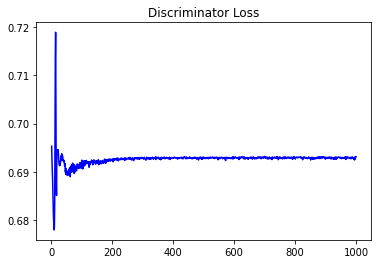

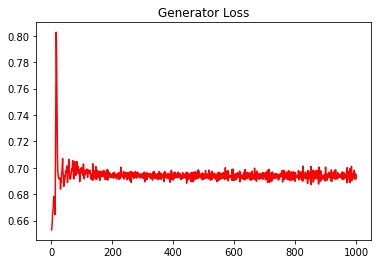

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07487070111936726


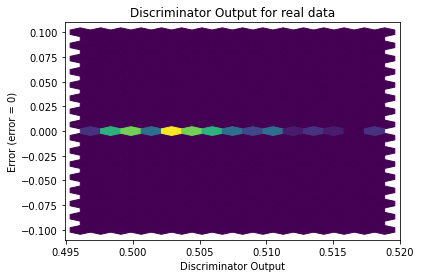

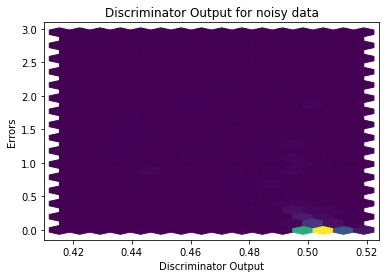

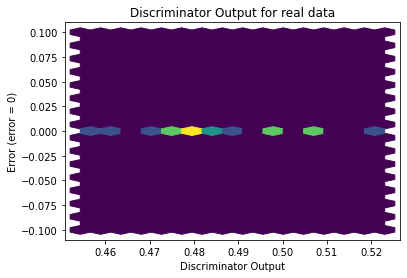

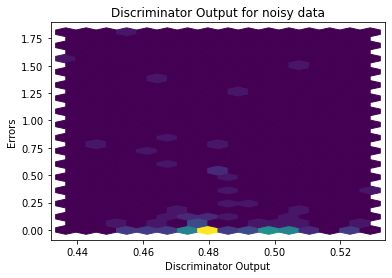

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


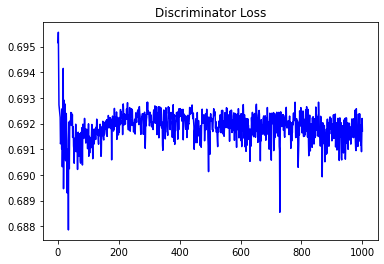

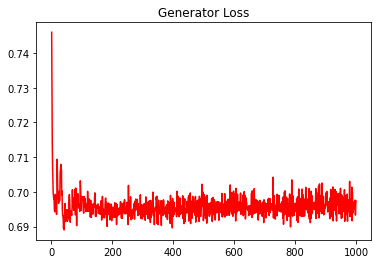

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03739967421765248


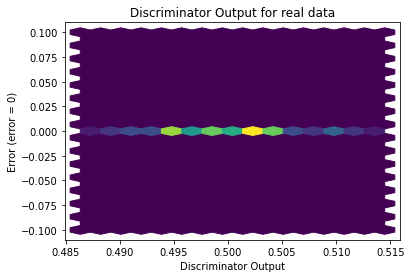

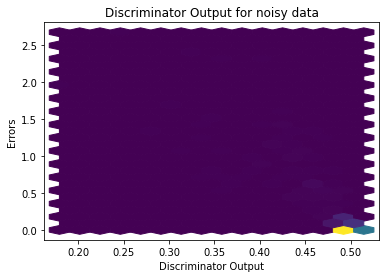

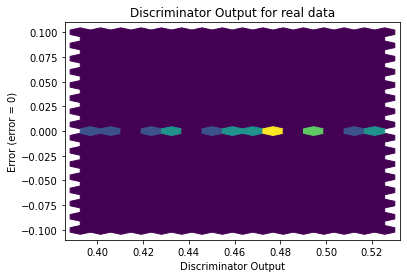

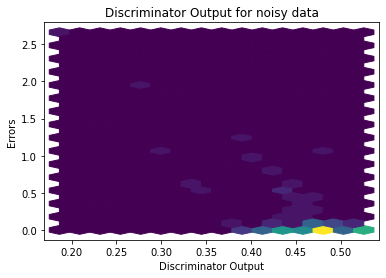

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4189]], requires_grad=True)
